<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Решающий-лес" data-toc-modified-id="Решающий-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Решающий лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Прогнозирование оттока клиентов банка

Из банка стали уходить клиенты. Каждый месяц немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.   
Для проекта предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

**Цель проекта:** спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.  

**Задачи:**  
- построить модель с предельно большим значением *F1*-меры  (не менее 0.59)
- проверить *F1*-меру на тестовой выборке
- дополнительно измерять *AUC-ROC*, сравнивать её значение с *F1*-мерой.

**Ход исследования:**
 * Шаг 1: Подготовка данных
 * Шаг 2: Исследование задачи
 * Шаг 3: Борьба с дисбалансом
 * Шаг 4: Тестирование модели
 * Шаг 5: Выводы

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pd.options.mode.chained_assignment = None
RANDOM_STATE = 12345

## Подготовка данных

Прочитаем файл и сохраним его в переменной `df`

Для ознакомления с данными выведем на экран информацию о таблице и первые 10 строк таблицы:

In [3]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB
None


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0


В нашем распоряжении информация о поведении 10000 клиентов банка.  
Согласно документации, в данных содержатся столбцы признаков и целевой признак.

**Признаки**
* *RowNumber* — индекс строки в данных
* *CustomerId* — уникальный идентификатор клиента
* *Surname* — фамилия
* *CreditScore* — кредитный рейтинг
* *Geography* — страна проживания
* *Gender* — пол
* *Age* — возраст
* *Tenure* — сколько лет человек является клиентом банка
* *Balance* — баланс на счёте
* *NumOfProducts* — количество продуктов банка, используемых клиентом
* *HasCrCard* — наличие кредитной карты
* *IsActiveMember* — активность клиента
* *EstimatedSalary* — предполагаемая зарплата

**Целевой признак**
* *Exited* — факт ухода клиента

Среди признаков содержатся столбцы, не влияющие на процесс обучения модели: например, *CustomerId* и *Surname*. Удалим эти столбцы.  
В столбце *Tenure* можно заменить тип данных на `int`.

Кроме этого, преобразуем категориальные признаки прямым кодированием.

In [4]:
df = df.drop(['CustomerId', 'Surname'], axis=1)
df['Tenure'] = df['Tenure'].astype('Int64')
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             9091 non-null   Int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: Int64(1), float64(2), int64(6), uint8(3)
memory usage: 820.3 KB


Проверим столбцы методом `describe()`.

In [5]:
df_ohe.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


Аномалий в данных обнаружено не было. Предварительно можно отметить наличие дисбаланса классов целевого признака: количество объектов положительного класса составляет всего 20% от общего числа.  
Проверим данные на наличие дубликатов и пропусков

In [6]:
df_ohe.duplicated().sum()

0

In [7]:
df_ohe.isna().sum()

CreditScore            0
Age                    0
Tenure               909
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Geography_Germany      0
Geography_Spain        0
Gender_Male            0
dtype: int64

Данные не содержат явных дубликатов, но в столбце `Tenure` содержится 9% пропусков. Обработать пропуски можно тремя способами:
* удалить строки с пропусками (потеря 9% данных на фоне общего количества данных будет некритичной)
* заменить пропуски нулями
* заменить пропуски средним/медианным значением

На данном этапе сложно предсказать, какой метод будет оптимальным с учетом дисбаланса классов, поэтому в качестве эксперимента подготовим все три варианта.

In [8]:
df_drop_na = df_ohe.dropna()
df_zeros_na = df_ohe.fillna(0)
df_median_na = df_ohe.fillna(df['Tenure'].median())

In [9]:
df_drop_na.info(), df_zeros_na.info(), df_median_na.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   Int64  
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: Int64(1), float64(2), int64(6), uint8(3)
memory usage: 745.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  

**Вывод 1:** 
Для проведения исследования в нашем распоряжении данные о поведении 10000 клиентов банка: таблица признаков и целевой признак `Exited`.  
Данные были подготовлены к исследованию: 
* произведена операция прямого кодирования категориальных признаков, 
* в столбце *Tenure* был изменён тип данных, 
* дубликатов и аномалий обнаружено не было. 
* Пропуски в столбце *Tenure* были обработаны тремя способами.

## Исследование задачи

Проведём исследование баланса классов. Предварительно на этапе подготовки данных мы отметили, что положительный класс составляет 20% от общего количества данных целевого признака. Получим более точные значения для трёх выборок, полученных в результате обработки пропусков:

In [10]:
print("Баланс классов:")
print('Drop NA:\n', df_drop_na['Exited'].value_counts(normalize=True))
print('Zeros NA:\n', df_zeros_na['Exited'].value_counts(normalize=True))
print('Median NA:\n', df_median_na['Exited'].value_counts(normalize=True))

Баланс классов:
Drop NA:
 0    0.796062
1    0.203938
Name: Exited, dtype: float64
Zeros NA:
 0    0.7963
1    0.2037
Name: Exited, dtype: float64
Median NA:
 0    0.7963
1    0.2037
Name: Exited, dtype: float64


Итак, на трёх полученных выборках практически одинаковое соотношение классов: 79.6% объектов принадлежат отрицательному классу, 20.4% - положительному.  
Выделим для каждой выборки признаки и целевой признак.

In [11]:
features_drop_na = df_drop_na.drop(['Exited'], axis=1) 
target_drop_na = df_drop_na['Exited']

features_zeros_na = df_zeros_na.drop(['Exited'], axis=1) 
target_zeros_na = df_zeros_na['Exited']

features_median_na = df_median_na.drop(['Exited'], axis=1) 
target_median_na = df_median_na['Exited']

Поскольку нам предстоит работать с тремя выборками, напишем функцию, разделяющую данные на тестовую, обучающую и валидационную выборки, а также функцию для масштабирования численных признаков.

In [12]:
def split(features, target):
    """
    Функция принимает на вход таблицу признаков features и столбец целевого признака target, 
    и возвращает тренировочную, валидационную и тестовую выборку для features и target в соотношении 3:1:1
    """
    
    # разледим выборку на две части: обучающую и тестовую
    (features_train, features_test, 
     target_train, target_test) = train_test_split(features, 
                                                   target,
                                                   stratify=target,
                                                   test_size=.4,
                                                   random_state=RANDOM_STATE)
    # разделим тестовую часть пополам - выделим валидационную часть
    (features_valid, features_test, 
     target_valid, target_test) = train_test_split(features_test, 
                                                   target_test, 
                                                   stratify=target_test,
                                                   test_size=.5,
                                                   random_state=RANDOM_STATE)
    return (features_train, features_valid, features_test,
           target_train, target_valid, target_test)

In [13]:
# обозначим столбцы с численными признаками
numeric = ['CreditScore', 'Age', 
           'Tenure', 'Balance', 
           'EstimatedSalary', 'NumOfProducts']

Разделим каждую выборку на обучающую, валидационную и тестовую, а затем применим к таблице признаков масштабиование численных столбцов.

In [15]:
# Таблица drop_na

(features_train_drop_na, 
 features_valid_drop_na, 
 features_test_drop_na,
 target_train_drop_na, 
 target_valid_drop_na, 
 target_test_drop_na) = split(features_drop_na, target_drop_na)


scaler = StandardScaler()
scaler.fit(features_train_drop_na[numeric])

features_train_drop_na[numeric] = scaler.transform(features_train_drop_na[numeric])
features_valid_drop_na[numeric] = scaler.transform(features_valid_drop_na[numeric])
features_test_drop_na[numeric] = scaler.transform(features_test_drop_na[numeric])

In [16]:
# Таблица zeros_na

(features_train_zeros_na, 
 features_valid_zeros_na, 
 features_test_zeros_na,
 target_train_zeros_na, 
 target_valid_zeros_na, 
 target_test_zeros_na) = split(features_zeros_na, target_zeros_na)


scaler = StandardScaler()
scaler.fit(features_train_zeros_na[numeric])

features_train_zeros_na[numeric] = scaler.transform(features_train_zeros_na[numeric])
features_valid_zeros_na[numeric] = scaler.transform(features_valid_zeros_na[numeric])
features_test_zeros_na[numeric] = scaler.transform(features_test_zeros_na[numeric])

In [17]:
# Таблица median_na

(features_train_median_na, 
 features_valid_median_na, 
 features_test_median_na,
 target_train_median_na, 
 target_valid_median_na, 
 target_test_median_na) = split(features_median_na, target_median_na)

scaler = StandardScaler()
scaler.fit(features_train_median_na[numeric])

features_train_median_na[numeric] = scaler.transform(features_train_median_na[numeric])
features_valid_median_na[numeric] = scaler.transform(features_valid_median_na[numeric])
features_test_median_na[numeric] = scaler.transform(features_test_median_na[numeric])

Напишем функции, обучающие модели решающего дерева, решающего леса и логистической регрессии и возвращающие значения f1_score, roc_auc_score, а также функцию, строющую график ROC-кривой.

In [18]:
def tree(features_train, target_train, features_valid, target_valid):
    """
    Функция принимает на вход тренировочную и валидационную выборку, обучает модель решающего дерева 
    и возвращает зачения f1_score, roc_auc_score и вероятности положительного класса для валидационной выборки
    """
    model = DecisionTreeClassifier(random_state=RANDOM_STATE)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    
    return (f1_score(target_valid, predicted_valid),
            roc_auc_score(target_valid, probabilities_one_valid),
            probabilities_one_valid)

In [19]:
def forest(features_train, target_train, features_valid, target_valid):
    """
    Функция принимает на вход тренировочную и валидационную выборку, обучает модель решающего леса 
    и возвращает зачения f1_score, roc_auc_score и вероятности положительного класса для валидационной выборки
    """
    model = RandomForestClassifier(random_state=RANDOM_STATE)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    
    return (f1_score(target_valid, predicted_valid),
            roc_auc_score(target_valid, probabilities_one_valid),
            probabilities_one_valid)

In [20]:
def log_reg(features_train, target_train, features_valid, target_valid):
    """
    Функция принимает на вход тренировочную и валидационную выборку, обучает модель логистической регрессии 
    и возвращает зачения f1_score, roc_auc_score и вероятности положительного класса для валидационной выборки
    """
    model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)

    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    
    return (f1_score(target_valid, predicted_valid),
            roc_auc_score(target_valid, probabilities_one_valid),
            probabilities_one_valid)

In [21]:
def roc_plot(target_valid, probabilities_one_valid):
    """
    Функция принимает на вход валидационный столбец целевого признака и вероятности положительного класса,
    предсказанные для валидационной выборки, и возвращает график ROC - кривой.
    """
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

    plt.figure()
    plt.plot(fpr, tpr)

    # ROC-кривая случайной модели (выглядит как прямая)
    plt.plot([0, 1], [0, 1], linestyle='--')

    #   установим границы осей от 0 до 1 >
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    #   подпишем оси
    plt.xlabel("False Positive Rate") 
    plt.ylabel("True Positive Rate")

    # добавим к графику заголовок
    plt.title("ROC-кривая")
    return plt.show()

Обучим модель **решающего дерева** на трёх выборках.

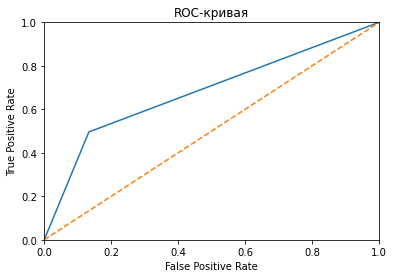

Drop NA:
F1_score: 0.4919786096256685 
AUC_ROC: 0.6812887338242334


In [22]:
f1_score_drop_na, auc_roc_drop_na, probabilities_one_valid_drop_na =  tree(features_train_drop_na,
                                                          target_train_drop_na, 
                                                          features_valid_drop_na, 
                                                          target_valid_drop_na)
roc_plot(target_valid_drop_na, probabilities_one_valid_drop_na)
print('Drop NA:\nF1_score:', f1_score_drop_na,'\nAUC_ROC:', auc_roc_drop_na)

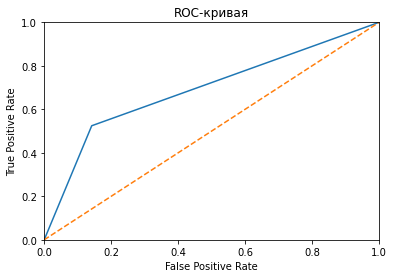

Zeros NA:
F1_score: 0.5047169811320754 
AUC_ROC: 0.6912750024632969


In [23]:
f1_score_zeros_na, auc_roc_zeros_na, probabilities_one_valid_zeros_na =  tree(features_train_zeros_na,
                                                          target_train_zeros_na, 
                                                          features_valid_zeros_na, 
                                                          target_valid_zeros_na)
roc_plot(target_valid_zeros_na, probabilities_one_valid_zeros_na)
print('Zeros NA:\nF1_score:', f1_score_zeros_na,'\nAUC_ROC:', auc_roc_zeros_na)

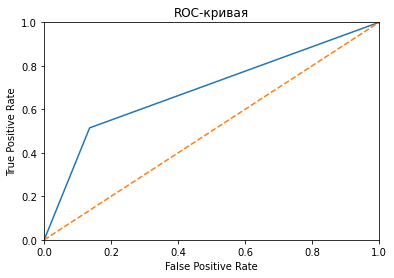

Median NA:
F1_score: 0.5035971223021583 
AUC_ROC: 0.6895137451965709


In [24]:
f1_score_median_na, auc_roc_median_na, probabilities_one_valid_median_na =  tree(features_train_median_na,
                                                          target_train_median_na, 
                                                          features_valid_median_na, 
                                                          target_valid_median_na)
roc_plot(target_valid_median_na, probabilities_one_valid_median_na)
print('Median NA:\nF1_score:', f1_score_median_na,'\nAUC_ROC:', auc_roc_median_na)

При дисбалансе выборок на модели решающего дерева для всех трёх выборок значение метрики F1 колеблется в диапазоне 0.49-0.5
0, а значение площади под ROC-кривой составляет 0.68-0.69. При этом, минимальные значения этих показателей наблюдаются для выборки Drop NA, в которой выброшены строчки с пропусками в столбце *Tenure*.

Обучим модель **решающего леса** на трёх выборках.

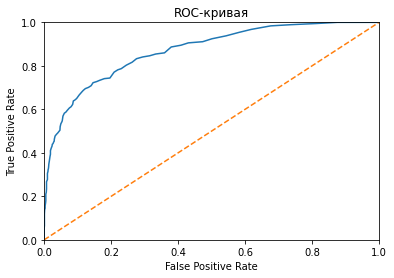

Drop NA:
F1_score: 0.5957446808510638 
AUC_ROC: 0.8698739095852186


In [25]:
f1_score_drop_na, auc_roc_drop_na, probabilities_one_valid_drop_na =  forest(features_train_drop_na,
                                                          target_train_drop_na, 
                                                          features_valid_drop_na, 
                                                          target_valid_drop_na)
roc_plot(target_valid_drop_na, probabilities_one_valid_drop_na)
print('Drop NA:\nF1_score:', f1_score_drop_na,'\nAUC_ROC:', auc_roc_drop_na)

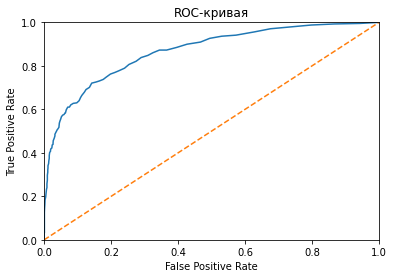

Zeros NA:
F1_score: 0.6103703703703703 
AUC_ROC: 0.8665770642427826


In [26]:
f1_score_zeros_na, auc_roc_zeros_na, probabilities_one_valid_zeros_na =  forest(features_train_zeros_na,
                                                          target_train_zeros_na, 
                                                          features_valid_zeros_na, 
                                                          target_valid_zeros_na)
roc_plot(target_valid_zeros_na, probabilities_one_valid_zeros_na)
print('Zeros NA:\nF1_score:', f1_score_zeros_na,'\nAUC_ROC:', auc_roc_zeros_na)

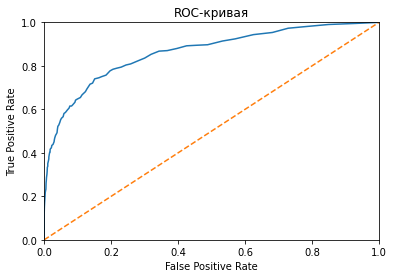

Median NA:
F1_score: 0.6126656848306332 
AUC_ROC: 0.8623956177948565


In [27]:
f1_score_median_na, auc_roc_median_na, probabilities_one_valid_median_na =  forest(features_train_median_na,
                                                          target_train_median_na, 
                                                          features_valid_median_na, 
                                                          target_valid_median_na)
roc_plot(target_valid_median_na, probabilities_one_valid_median_na)
print('Median NA:\nF1_score:', f1_score_median_na,'\nAUC_ROC:', auc_roc_median_na)

При дисбалансе выборок на модели решающего леса для всех трёх выборок значение метрики F1 колеблется в диапазоне 0.59-0.61, а значение AUC_ROC составляет 0.86-0.87. При этом, аналогично, минимальные значения этих показателей наблюдаются для выборки Drop NA, в которой выброшены строчки с пропусками в столбце *Tenure*.

Обучим модель **логистической регрессии** на трёх выборках.

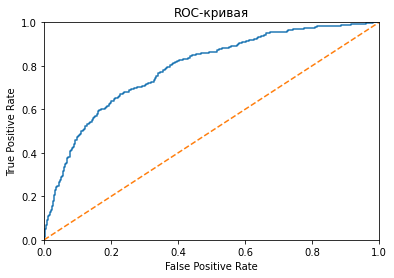

Drop NA:
F1_score: 0.3306772908366534 
AUC_ROC: 0.7893010355098474


In [28]:
f1_score_drop_na, auc_roc_drop_na, probabilities_one_valid_drop_na =  log_reg(features_train_drop_na,
                                                          target_train_drop_na, 
                                                          features_valid_drop_na, 
                                                          target_valid_drop_na)
roc_plot(target_valid_drop_na, probabilities_one_valid_drop_na)
print('Drop NA:\nF1_score:', f1_score_drop_na,'\nAUC_ROC:', auc_roc_drop_na)

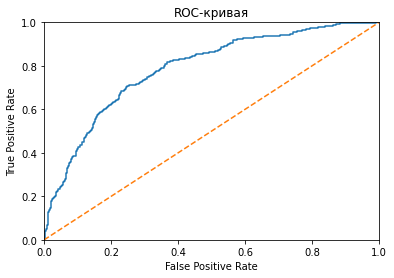

Zeros NA:
F1_score: 0.3076923076923077 
AUC_ROC: 0.787586831214898


In [29]:
f1_score_zeros_na, auc_roc_zeros_na, probabilities_one_valid_zeros_na =  log_reg(features_train_zeros_na,
                                                          target_train_zeros_na, 
                                                          features_valid_zeros_na, 
                                                          target_valid_zeros_na)
roc_plot(target_valid_zeros_na, probabilities_one_valid_zeros_na)
print('Zeros NA:\nF1_score:', f1_score_zeros_na,'\nAUC_ROC:', auc_roc_zeros_na)

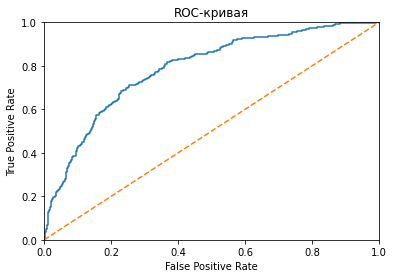

Median NA:
F1_score: 0.3076923076923077 
AUC_ROC: 0.7875052345058627


In [30]:
f1_score_median_na, auc_roc_median_na, probabilities_one_valid_median_na =  log_reg(features_train_median_na,
                                                          target_train_median_na, 
                                                          features_valid_median_na, 
                                                          target_valid_median_na)
roc_plot(target_valid_median_na, probabilities_one_valid_median_na)
print('Median NA:\nF1_score:', f1_score_median_na,'\nAUC_ROC:', auc_roc_median_na)

Для трёх выборок значение метрики F1 колеблется в диапазоне 0.30-0.33, а значение AUC_ROC составляет 0.78-0.79. При этом, аналогично, минимальные значения этих показателей наблюдаются для выборок Zeros NA, Median NA.

**Вывод 2:**  
* Было приведено исследование баланса классов: на трёх полученных в результате обработки пропусков выборках практически одинаковое соотношение классов: 79.6% объектов принадлежат отрицательному классу, 20.4% - положительному.
* Для трёх выборок без учета дисбаланса классов были исследованы модели решающего дерева, решающего леса и логистической регрессии: максимальное значение метрики F1 составляет 0.62 и было получено при обучении модели решающего леса на выборке *Median NA*; максимальное значение AUC_ROC было получено, аналогично, при обучении модели решающего леса на выборке *Zeros NA* и составляет 0.87.
* Поскольку для всех выборок результаты обучения той или иной модели не сильно отличаются, в дальнейшем будем работать только с одной выборкой *Median NA*.

## Борьба с дисбалансом

Рассмотрим три способа борьбы с дисбалансом классов:
* Взвешивание классов
* Upsampling
* Downsampling

Первый метод реализуется с помощью аргумента `class_weight='balanced'` в алгоритме машинного обучения. Для методов *upsampling* и *downsampling* предварительно напишем функции и подготовим данные.

In [31]:
def upsample(features, target, repeat):
    """
    Функция увеличения выборки, принимающая на вход таблицу признаков, столбец
    целевого признака и количество повторений объектов положительного класса.
    Функция возвращает преобразованные таблицу признаков и столбец целевого признака.
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, 
                                                   target_upsampled, 
                                                   random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled


In [32]:
def downsample(features, target, fraction):
    """
    Функция уменьшения выборки, принимающая на вход таблицу признаков, столбец
    целевого признака и долю объектов отрицательного класса от исходной таблицы.
    Функция возвращает преобразованные таблицу признаков и столбец целевого признака.
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)]
        + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)]
        + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, 
                                                       target_downsampled, 
                                                       random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

Определим количество повторений объекта положительного класса для метода *Upsampling* и долю объектов отрицательного класса, которую случайным образом предстоит выбрать в методе *Downsampling*.

In [33]:
# Определим количество объектов обоих классов
zeros_len = len(target_train_median_na[target_train_median_na == 0])
ones_len = len(target_train_median_na[target_train_median_na == 1])

# определим количество повторов и долю для наших функций
repeat = int(np.ceil(zeros_len / ones_len))
fraction = ones_len / zeros_len
# Выведем на экран
repeat, fraction

(4, 0.25575554625366265)

**Upsampling**  
Произведём операцию увеличения обучающей выборки:

In [34]:
features_train_up, target_train_up = upsample(features_train_median_na,
                                              target_train_median_na,
                                              repeat)
# выведем на экран размеры полученных выборок и число объектов каждого класса
features_train_up.shape, target_train_up.shape,  target_train_up.value_counts(normalize=True)

((9666, 11),
 (9666,),
 1    0.50569
 0    0.49431
 Name: Exited, dtype: float64)

Итак, количество объектов обоих классов примерно одинаково, а тренировочная выборка увеличилась - преобразование произошло успешно.

**Downsampling**
Подготовим обучающую выборку методом уменьшения.

In [35]:
features_train_down, target_train_down = downsample(features_train_median_na,
                                              target_train_median_na,
                                              fraction)
# выведем на экран размеры полученных выборок и число объектов каждого класса
features_train_down.shape, target_train_down.shape,  target_train_down.value_counts(normalize=True)

((2444, 11),
 (2444,),
 0    0.5
 1    0.5
 Name: Exited, dtype: float64)

Размер выборки уменьшился, а количество объектов обоих классов стало одинаковым.  

Перейдём к обучению различных моделей на сбалансированных выборках.

### Решающее дерево

Рассмотрим модель решающего дерева при разных значениях глубины дерева (от 1 до 10) и выберем глубину, позволяющую достичь максимального значения доли правильных предсказаний модели для трёх рассмотренных случаев борьбы с дисбалансом классов.

**Решающее дерево и взвешивание классов**

Взвешивание классов 
F1-score лучшей модели решающего дерева: 0.576 
AUC_ROC лучшей модели решающего дерева: 0.823 
Максимальная глубина: 6


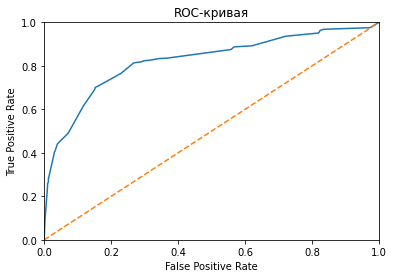

In [36]:
best_model_tree = None
best_f1_tree = 0
best_depth = 1

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, class_weight='balanced') 
    model.fit(features_train_median_na, target_train_median_na) # обучаем модель на обучающей выборке
    predictions_valid = model.predict(features_valid_median_na) # получим предсказания модели на валидационной выборке
    f1 = f1_score(target_valid_median_na, predictions_valid) # посчитаем качество модели на валидационной выборке
    
    
    if f1 > best_f1_tree:
        best_model_tree = model
        best_depth = depth
        best_f1_tree = f1
        probabilities_valid = model.predict_proba(features_valid_median_na)
        probabilities_one_valid_weight = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid_median_na, probabilities_one_valid_weight)
        
print("Взвешивание классов",
      "\nF1-score лучшей модели решающего дерева:", best_f1_tree.round(3),
      "\nAUC_ROC лучшей модели решающего дерева:", auc_roc.round(3),
      "\nМаксимальная глубина:", best_depth)
roc_plot(target_valid_median_na, probabilities_one_valid_weight)

**Решающее дерево и Upsampling**

Upsampling 
F1-score лучшей модели решающего дерева: 0.576 
AUC_ROC лучшей модели решающего дерева: 0.823 
Максимальная глубина: 6


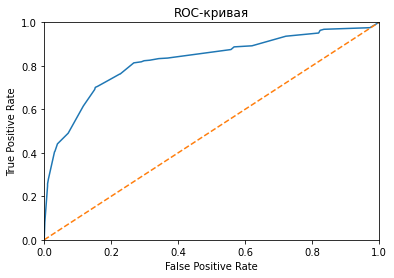

In [37]:
best_model_tree = None
best_f1_tree = 0
best_depth = 1

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth) 
    model.fit(features_train_up, target_train_up) # обучаем модель на обучающей выборке
    predictions_valid = model.predict(features_valid_median_na) # получим предсказания модели на валидационной выборке
    f1 = f1_score(target_valid_median_na, predictions_valid) # посчитаем качество модели на валидационной выборке
    
    
    if f1 > best_f1_tree:
        best_model_tree = model
        best_depth = depth
        best_f1_tree = f1
        probabilities_valid = model.predict_proba(features_valid_median_na)
        probabilities_one_valid_up = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid_median_na, probabilities_one_valid_up)
        
print("Upsampling",
      "\nF1-score лучшей модели решающего дерева:", best_f1_tree.round(3),
      "\nAUC_ROC лучшей модели решающего дерева:", auc_roc.round(3),
      "\nМаксимальная глубина:", best_depth)
roc_plot(target_valid_median_na, probabilities_one_valid_up)

**Решающее дерево и Downsampling**

Downsampling 
F1-score лучшей модели решающего дерева: 0.598 
AUC_ROC лучшей модели решающего дерева: 0.853 
Максимальная глубина: 6


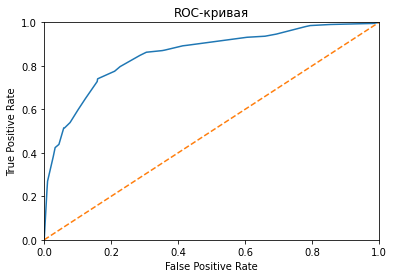

In [38]:
best_model_tree = None
best_f1_tree = 0
best_depth = 1

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth) 
    model.fit(features_train_down, target_train_down) # обучаем модель на обучающей выборке
    predictions_valid = model.predict(features_valid_median_na) # получим предсказания модели на валидационной выборке
    f1 = f1_score(target_valid_median_na, predictions_valid) # посчитаем качество модели на валидационной выборке
    
    
    if f1 > best_f1_tree:
        best_model_tree = model
        best_depth = depth
        best_f1_tree = f1
        probabilities_valid = model.predict_proba(features_valid_median_na)
        probabilities_one_valid_down = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid_median_na, probabilities_one_valid_down)
        
print("Downsampling",
      "\nF1-score лучшей модели решающего дерева:", best_f1_tree.round(3),
      "\nAUC_ROC лучшей модели решающего дерева:", auc_roc.round(3),
      "\nМаксимальная глубина:", best_depth)
roc_plot(target_valid_median_na, probabilities_one_valid_down)

Максимальные показатели F1-меры (0.6) удалось досчить при обучении решающего дерева на выборках, сбалансированных по техникам upsampling и downsampling, однако максимальная площадь под ROC-кривой (0.852) получена при методе downsampling и глубине дерева, равной 6.

### Решающий лес

Рассмотрим следующую модель - решающий лес. Будем менять количество деревьев от 10 до 50 с шагом в 5 деревьев, а также максимальную глубину этих деревьев, чтобы определить оптимальные гиперпараметры для получения наибольшего значения точности предсказаний модели.

**Решающий лес и взвешивание классов**

Взвешивание классов 
F1-score лучшей модели решающего леса: 0.65 
AUC_ROC лучшей модели решающего леса: 0.87 
Максимальная глубина: 10 
Количество деревьев: 30


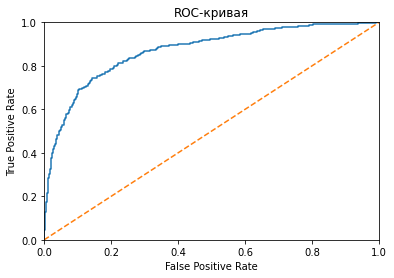

Wall time: 12.4 s


In [39]:
%%time

best_model_forest = None
best_f1_forest = 0
best_est = 0
best_depth = 0

for est in range(10, 51, 5): # меняем количество деревьев
    for depth in range (1, 11): # меняем максимальную глубину деревьев
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train_median_na, target_train_median_na) # обучаем модель на обучающей выборке
        predictions_valid = model.predict(features_valid_median_na) # получим предсказания модели на валидационной выборке
        f1 = f1_score(target_valid_median_na, predictions_valid) # посчитаем качество модели на валидационной выборке
        
        if f1 > best_f1_forest:
            best_model_forest = model
            best_est = est
            best_depth = depth
            best_f1_forest = f1
            probabilities_valid = model.predict_proba(features_valid_median_na)
            probabilities_one_valid_weight = probabilities_valid[:, 1]
            auc_roc = roc_auc_score(target_valid_median_na, probabilities_one_valid_weight)
        
print("Взвешивание классов",
      "\nF1-score лучшей модели решающего леса:", best_f1_forest.round(3),
      "\nAUC_ROC лучшей модели решающего леса:", auc_roc.round(3),
      "\nМаксимальная глубина:", best_depth,
      "\nКоличество деревьев:", best_est,)
roc_plot(target_valid_median_na, probabilities_one_valid_weight)

**Решающий лес и Upsampling**

Upsampling 
F1-score лучшей модели решающего леса: 0.651 
AUC_ROC лучшей модели решающего леса: 0.866 
Максимальная глубина: 10 
Количество деревьев: 30


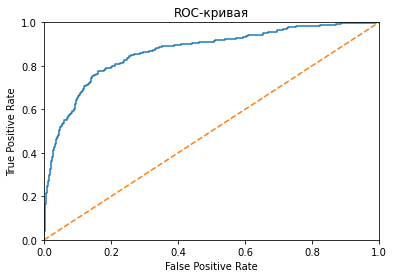

Wall time: 16.7 s


In [40]:
%%time

best_model_forest = None
best_f1_forest = 0
best_est = 0
best_depth = 0

for est in range(10, 51, 5): # меняем количество деревьев
    for depth in range (1, 11): # меняем максимальную глубину деревьев
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        model.fit(features_train_up, target_train_up) # обучаем модель на обучающей выборке
        predictions_valid = model.predict(features_valid_median_na) # получим предсказания модели на валидационной выборке
        f1 = f1_score(target_valid_median_na, predictions_valid) # посчитаем качество модели на валидационной выборке
        
        if f1 > best_f1_forest:
            best_model_forest = model
            best_est = est
            best_depth = depth
            best_f1_forest = f1
            probabilities_valid = model.predict_proba(features_valid_median_na)
            probabilities_one_valid_up = probabilities_valid[:, 1]
            auc_roc = roc_auc_score(target_valid_median_na, probabilities_one_valid_up)
        
print("Upsampling",
      "\nF1-score лучшей модели решающего леса:", best_f1_forest.round(3),
      "\nAUC_ROC лучшей модели решающего леса:", auc_roc.round(3),
      "\nМаксимальная глубина:", best_depth,
      "\nКоличество деревьев:", best_est,)
roc_plot(target_valid_median_na, probabilities_one_valid_up)

**Решающий лес и Downsampling**

Downsampling 
F1-score лучшей модели решающего леса: 0.632 
AUC_ROC лучшей модели решающего леса: 0.867 
Максимальная глубина: 8 
Количество деревьев: 45


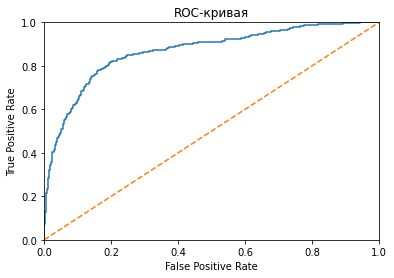

Wall time: 7.71 s


In [41]:
%%time

best_model_forest = None
best_f1_forest = 0
best_est = 0
best_depth = 0

for est in range(10, 51, 5): # меняем количество деревьев
    for depth in range (1, 11): # меняем максимальную глубину деревьев
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        model.fit(features_train_down, target_train_down) # обучаем модель на обучающей выборке
        predictions_valid = model.predict(features_valid_median_na) # получим предсказания модели на валидационной выборке
        f1 = f1_score(target_valid_median_na, predictions_valid) # посчитаем качество модели на валидационной выборке
        
        if f1 > best_f1_forest:
            best_model_forest = model
            best_est = est
            best_depth = depth
            best_f1_forest = f1
            probabilities_valid = model.predict_proba(features_valid_median_na)
            probabilities_one_valid_down = probabilities_valid[:, 1]
            auc_roc = roc_auc_score(target_valid_median_na, probabilities_one_valid_down)
        
print("Downsampling",
      "\nF1-score лучшей модели решающего леса:", best_f1_forest.round(3),
      "\nAUC_ROC лучшей модели решающего леса:", auc_roc.round(3),
      "\nМаксимальная глубина:", best_depth,
      "\nКоличество деревьев:", best_est,)
roc_plot(target_valid_median_na, probabilities_one_valid_down)

Максимальное значение F1-меры (0.647) было получено при методе балансирования классов *Upsampling*. Показатель AUC-ROC при всех методах борьбы с дисбалансом классов составляет 0.865 - 0.875.

### Логистическая регрессия

Проверим, как с поставленной задачей справится модель логистической регрессии.

**Логистическая регрессия и взвешивание классов**

Взвешивание классов 
F1-score модели логистической регрессии: 0.529 
AUC_ROC модели логистической регрессии: 0.794


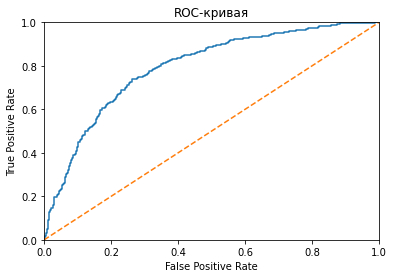

In [42]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', class_weight='balanced')


model.fit(features_train_median_na, target_train_median_na) # обучаем модель на обучающей выборке
predictions_valid = model.predict(features_valid_median_na) # получим предсказания модели на валидационной выборке
f1 = f1_score(target_valid_median_na, predictions_valid) # посчитаем качество модели на валидационной выборке
probabilities_valid = model.predict_proba(features_valid_median_na)
probabilities_one_valid_weight = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid_median_na, probabilities_one_valid_weight)

print("Взвешивание классов",
      "\nF1-score модели логистической регрессии:", f1.round(3),
      "\nAUC_ROC модели логистической регрессии:", auc_roc.round(3))
roc_plot(target_valid_median_na, probabilities_one_valid_weight)

**Логистическая регрессия и Upsampling**

Upsampling 
F1-score модели логистической регрессии: 0.525 
AUC_ROC модели логистической регрессии: 0.794


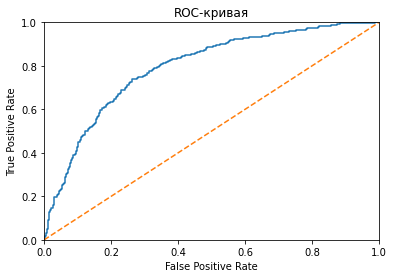

In [43]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')


model.fit(features_train_up, target_train_up) # обучаем модель на обучающей выборке
predictions_valid = model.predict(features_valid_median_na) # получим предсказания модели на валидационной выборке
f1 = f1_score(target_valid_median_na, predictions_valid) # посчитаем качество модели на валидационной выборке
probabilities_valid = model.predict_proba(features_valid_median_na)
probabilities_one_valid_up = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid_median_na, probabilities_one_valid_up)

print("Upsampling",
      "\nF1-score модели логистической регрессии:", f1.round(3),
      "\nAUC_ROC модели логистической регрессии:", auc_roc.round(3))
roc_plot(target_valid_median_na, probabilities_one_valid_up)

**Логистическая регрессия и Downsampling**

Downsampling 
F1-score модели логистической регрессии: 0.527 
AUC_ROC модели логистической регрессии: 0.793


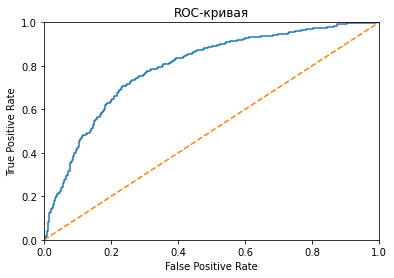

In [44]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')


model.fit(features_train_down, target_train_down) # обучаем модель на обучающей выборке
predictions_valid = model.predict(features_valid_median_na) # получим предсказания модели на валидационной выборке
f1 = f1_score(target_valid_median_na, predictions_valid) # посчитаем качество модели на валидационной выборке
probabilities_valid = model.predict_proba(features_valid_median_na)
probabilities_one_valid_down = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid_median_na, probabilities_one_valid_down)

print("Downsampling",
      "\nF1-score модели логистической регрессии:", f1.round(3),
      "\nAUC_ROC модели логистической регрессии:", auc_roc.round(3))
roc_plot(target_valid_median_na, probabilities_one_valid_down)

ДЛя трёх выборок показатели F1 и AUC_ROC практически одинаковые, однако максимальное значение F1-меры (0.506) удалось получить при методе балансирования классов через параметр `class_weight='balanced'`.

**Вывод 3:**
В результате исследования методов борьбы с дисбалансом классов были обнаружены следующие закономерности:
* в случае решающего леса и решающего дерева наилучшее качество обучения достигается при применении метода *Upsampling*.
* наилучшее качество обучения предоставляет модель решающего леса с 30 деревьями и максимальной глубиной, равной 10 (F1-score =  0.651, AUC_ROC = 0.866)




| **Decision Tree**  | **class_weight='balanced'**  | **Upsampling** | **Downsampling** |
|:-----------------: |:----------------------------:| :-------------:|:----------------:|
| **F1 - score**     | 0.576                        | 0.576          | 0.598            |
| **AUC-ROC**        | 0.823                        | 0.823          | 0.853            |
| **Max Depth**      | 6                            | 6              | 6                |


| **Random Forest**  | **class_weight='balanced'**  | **Upsampling** | **Downsampling** |
|:-----------------: |:----------------------------:| :-------------:|:----------------:|
| **F1 - score**     | 0.65                         | **0.651**      | 0.632            |
| **AUC-ROC**        | 0.87                         | **0.866**      | 0.867            |
| **Max Depth**      | 10                           | **10**         | 8                |
| **Estimators**     | 30                           | **30**         | 45               |


| **Logistic Regression**  | **class_weight='balanced'**  | **Upsampling** | **Downsampling** |
|:-----------------------: |:----------------------------:| :-------------:|:----------------:|
| **F1 - score**           | 0.529                        | 0.525          | 0.527            |
| **AUC-ROC**              | 0.794                        | 0.794          | 0.793            |




## Тестирование модели

Проверим лучшую модель решающего дерева на тестовой выборке.
Предварительно объединим обучающую и валидационную выборки и заново обучим каждую модель на объединённой выборке.

In [45]:
features_train_median_na = features_train_median_na.append(features_valid_median_na)
target_train_median_na = target_train_median_na.append(target_valid_median_na)

print(features_train_median_na.shape)
print(target_train_median_na.shape)

(8000, 11)
(8000,)


Применим к объединённой выборке метод upsampling:

In [46]:
features_train_up, target_train_up = upsample(features_train_median_na,
                                              target_train_median_na,
                                              repeat)
# выведем на экран размеры полученных выборок и число объектов каждого класса
features_train_up.shape, target_train_up.shape,  target_train_up.value_counts(normalize=True)

((12890, 11),
 (12890,),
 1    0.505818
 0    0.494182
 Name: Exited, dtype: float64)

Модель решающего леса с 50 деревьями и максимальной глубиной 10, обученная на выборке, сбалансированной методом Upsampling 
F1-score: 0.611 
AUC_ROC: 0.859 
Accuracy: 0.824


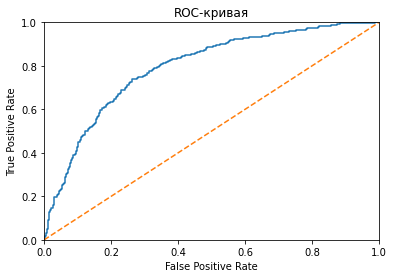

In [47]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=50, max_depth=10)
model.fit(features_train_up, target_train_up) # обучаем модель на обучающей выборке

predictions_test = model.predict(features_test_median_na) # получим предсказания модели на валидационной выборке
f1 = f1_score(target_test_median_na, predictions_test) # посчитаем качество модели на валидационной выборке

probabilities_test = model.predict_proba(features_test_median_na)
probabilities_one_test_up = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test_median_na, probabilities_one_test_up)
accuracy_test = accuracy_score(target_test_median_na, predictions_test)
        
print("Модель решающего леса с 50 деревьями и максимальной глубиной 10, обученная на выборке, сбалансированной методом Upsampling",
      "\nF1-score:", f1.round(3),
      "\nAUC_ROC:", auc_roc.round(3),
      "\nAccuracy:", accuracy_test.round(3))
roc_plot(target_valid_median_na, probabilities_one_valid_up)

## Выводы

Целью проекта является построение для компании "Бета-Банк" модели классификации с максимально большим значением F1-меры, позволяющей предсказать уход клиентов из банка.  
В ходе выполнения задания проекта были произведены обзор  и предобработка данных компании, в результате которых:
* произведена операция прямого кодирования категориальных признаков, 
* в столбце *Tenure* был изменён тип данных, 
* дубликатов и аномалий обнаружено не было, 
* пропуски в столбце *Tenure* были обработаны тремя способами (уделение строк, содержащих пропуски, замена пропусков нулями и замена пропусков медианным значением признака),
* значения признаков были отмасштабированы
* данные были разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.

Далее чего были исследованы баланс классов: на трёх полученных в результате обработки пропусков выборках практически одинаковое соотношение классов: 79.6% объектов принадлежат отрицательному классу, 20.4% - положительному. Без учета дисбаланса классов были исследованы модели решающего дерева, решающего леса и логистической регресси: максимальное значение метрики F1 (0.62) было получено при обучении модели решающего леса на выборке с заменой пропусков на медианные значения.


Были рассмотрены три способа борьбы с дисбалансом классов (взвешивание классов, upsampling, downsampling), в результате чего было обнаружено, что:
* в случае решающего леса и решающего дерева наилучшее качество обучения достигается при применении метода *Upsampling*.
* наилучшее качество обучения предоставляет модель решающего леса с 50 деревьями и максимальной глубиной, равной 10 (F1-score =  0.647, AUC_ROC = 0.875)

При проверке лучшей модели решающего леса на тестовой выборке было получено значение F1-меры, равное 0.6, а также значение AUC-ROC = 0.862. Это говорит о том, что наша модель решающего леса вполне разумно предсказывает уход клиента из банка (то есть лучше, чем модель случайного классификатора)